In [5]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

sns.set_style("whitegrid", {"font.family": ["serif"]})
sns.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


In [221]:
with open('wine_data_longer.pkl', 'rb') as picklefile: 
    wine_data = pickle.load(picklefile)

In [222]:
wine_data.head()

,Average Rating,Winery,Wine Name,Vintage,Type,Region,Country,Number of Reviews,Average Price
0,4.298098,Veuve Clicquot,Brut (Carte Jaune) Champagne,N.V.,Sparkling wine,Champagne,France,98098,49.99
1,4.187012,Moët & Chandon,Impérial Brut Champagne,N.V.,Sparkling wine,Champagne,France,87012,error
2,3.767924,Casal Garcia,Vinho Verde Branco,N.V.,White wine,Vinho Verde,Portugal,67924,error
3,4.352855,Farnese,Edizione Cinque Autoctoni,N.V.,Red wine,Abruzzo,Italy,52855,error
4,3.847411,Piccini,Memoro Rosso,N.V.,Red wine,Toscana,Italy,47411,10.99


In [223]:
#remove rows with no average price
wine_data = wine_data[wine_data['Average Price'] != 'error']

In [168]:
#move number of reviews out of average rating
'''
def strip_paren(x):
    if "(" in x:
        return x.split("(")[1]
    else:
        pass
'''

In [169]:
'''
wine_data_clean['Number of Reviews'] = wine_data_clean['Average Rating'].apply(strip_paren)
wine_data_clean['Number of Reviews'].replace(')', '')
wine_data_clean['Average Rating'] = wine_data_clean['Average Rating'].apply(lambda x: str(x).split('(')[0])
wine_data_clean['Number of Reviews'] = wine_data_clean['Number of Reviews'].apply(lambda x: str(x).replace(')', ''))
'''

<ipython-input-169-4b8022bec6c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_clean['Number of Reviews'] = wine_data_clean['Average Rating'].apply(strip_paren)
<ipython-input-169-4b8022bec6c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_clean['Average Rating'] = wine_data_clean['Average Rating'].apply(lambda x: str(x).split('(')[0])
<ipython-input-169-4b8022bec6c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [262]:
#get rid of rows with messed up avg rating - its not many
#wine_data = wine_data[~wine_data["Average Rating"].isin(['('])]
wine_data = wine_data[:1400]

In [269]:
#drop rows with no year
wine_data = wine_data[wine_data['Vintage'] != 'N.V.']

In [270]:
#convert to numerical
wine_data['Average Rating'] = wine_data['Average Rating'].astype(float)
wine_data['Number of Reviews'] = wine_data['Number of Reviews'].astype(int)
wine_data['Average Price'] = wine_data['Average Price'].astype(float)
wine_data['Vintage'] = wine_data['Vintage'].astype(int)

<ipython-input-270-fd1063de43cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data['Average Rating'] = wine_data['Average Rating'].astype(float)
<ipython-input-270-fd1063de43cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data['Number of Reviews'] = wine_data['Number of Reviews'].astype(int)
<ipython-input-270-fd1063de43cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [273]:
wine_data.shape

(1288, 9)

In [280]:
#CHALLENGE 1
wine_data['Rating Mean'] = wine_data['Average Rating'].mean()

<ipython-input-280-1cc898318c6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data['Rating Mean'] = wine_data['Average Rating'].mean()


In [281]:
wine_data

,Average Rating,Winery,Wine Name,Vintage,Type,Region,Country,Number of Reviews,Average Price,Mean,Rating Mean
18,4.123169,Marqués de Riscal,Rioja Reserva,2014,Red wine,Rioja,Spain,23169,18.99,NaN,3.906712
28,4.618701,Dom Pérignon,Brut Champagne,2006,Sparkling wine,Champagne,France,18701,249.99,NaN,3.906712
30,3.618200,Casillero del Diablo,Cabernet Sauvignon (Reserva),2017,Red wine,Central Valley,Chile,18200,9.99,NaN,3.906712
35,3.717321,Apothic,Red (Winemaker's Blend),2014,Red wine,California,United States,17321,13.98,NaN,3.906712
45,4.316529,San Marzano,Cinquanta Collezione,2012,Red wine,Vino d'Italia,Italy,16529,23.21,NaN,3.906712
...,...,...,...,...,...,...,...,...,...,...,...
3165,3.731980,Paulo Laureano,Premium Vinhas Velhas Tinto,2015,Red wine,Alentejo,Portugal,3198,15.32,NaN,3.906712
3166,4.332000,Matarromera,Ribera del Duero Reserva,2014,Red wine,Ribera del Duero,Spain,3200,39.00,NaN,3.906712
3167,3.831960,Condado de Haza,Crianza Ribera del Duero,2012,Red wine,Ribera del Duero,Spain,3196,22.99,NaN,3.906712
3168,4.431960,Rutini,Malbec,2017,Red wine,Mendoza,Argentina,3196,26.99,NaN,3.906712


In [321]:
X = wine_data[['Rating Mean']]
y = wine_data['Average Rating']

lr = LinearRegression()
lr.fit(X, y)

y_predicted = lr.predict(X)

In [322]:
score = lr.score(X, y)
score

0.0

Text(0.5, 1.0, 'Actuals vs. Predicted - User Submitted Wine Ratings')

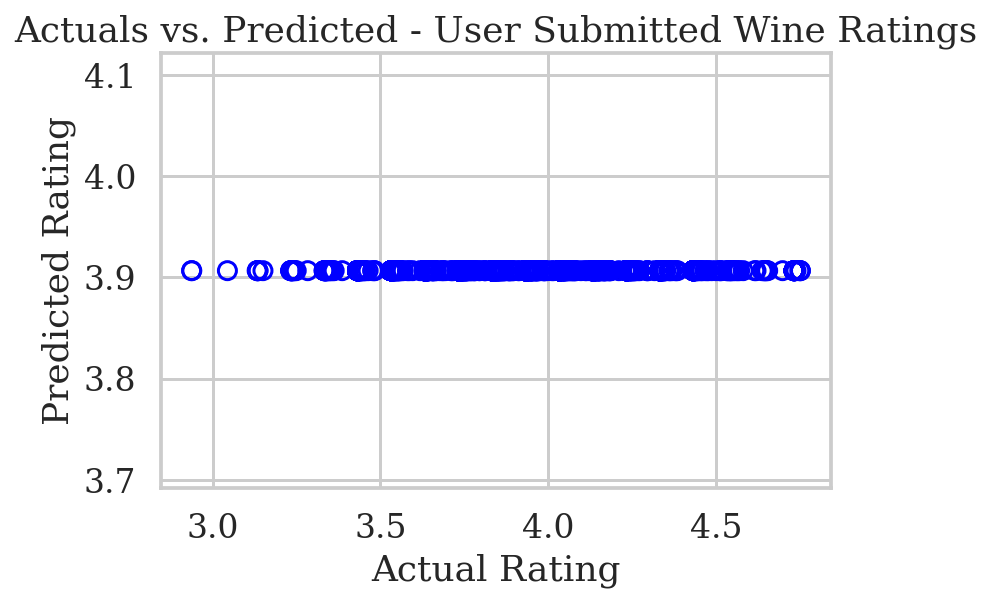

In [323]:
plt.scatter(y, y_predicted, facecolors='none', edgecolors='b')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actuals vs. Predicted - User Submitted Wine Ratings')

Text(0.5, 1.0, 'Histogram of Residuals')

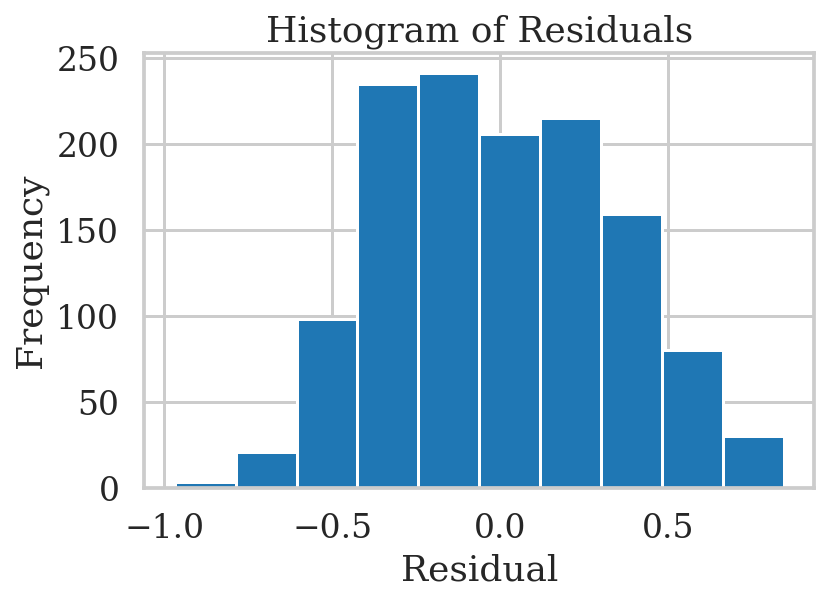

In [324]:
y_resid = y - y_predicted
hist(y_resid, bins=10)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

In [330]:
#Challenge 2
X = wine_data[['Rating Mean', 'Average Price']]
y = wine_data['Average Rating']

lr = LinearRegression()
lr.fit(X, y)

y_predicted = lr.predict(X)

In [331]:
score = lr.score(X, y)
score

0.23390383495214495

In [332]:
lr.coef_

array([0.        , 0.00379403])

Text(0.5, 1.0, 'Actuals vs. Predicted - User Submitted Wine Ratings')

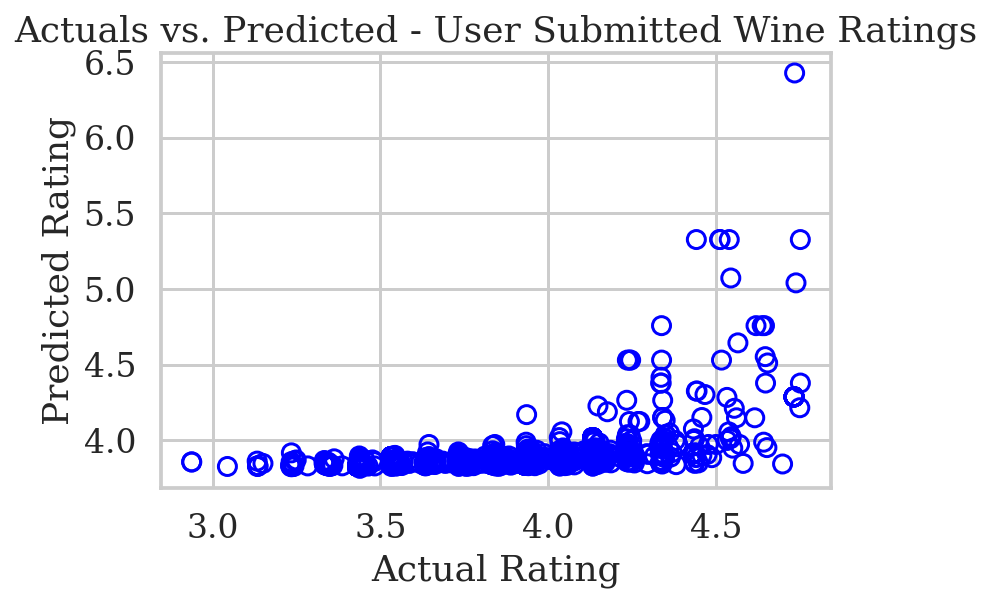

In [333]:
#actuals vs predicted
plt.scatter(y, y_predicted, facecolors='none', edgecolors='b')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actuals vs. Predicted - User Submitted Wine Ratings')

Text(0.5, 1.0, 'Histogram of Residuals')

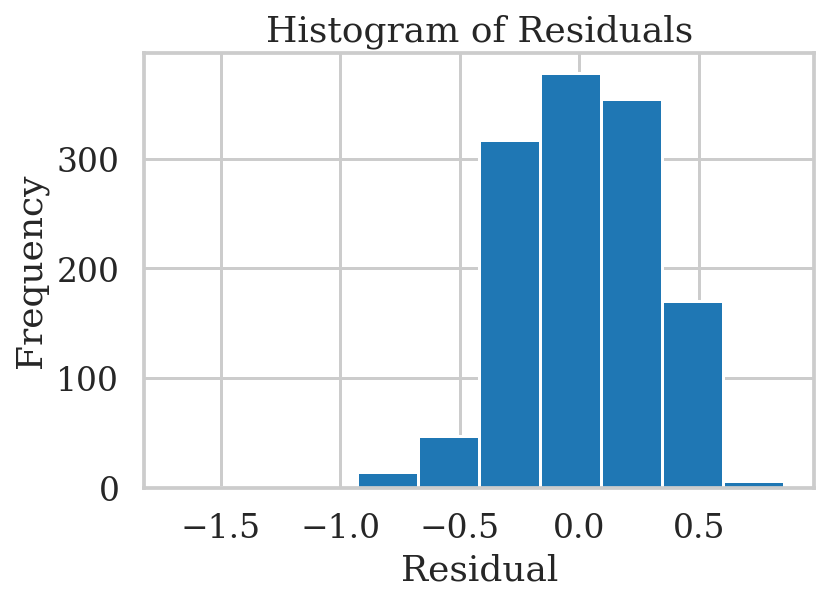

In [334]:
#hist of residuals
y_resid = y - y_predicted
hist(y_resid, bins=10)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

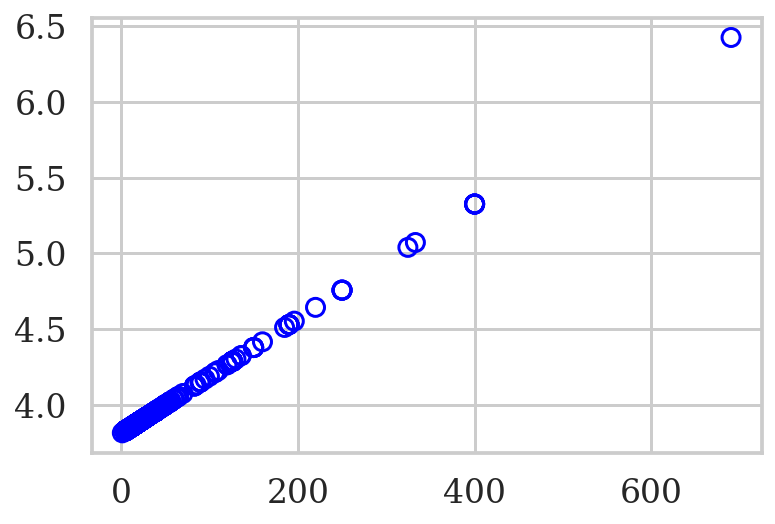

In [315]:
#average bottle price vs predicted rating
plt.scatter(wine_data['Average Price'], y_predicted, facecolors='none', edgecolors='b')

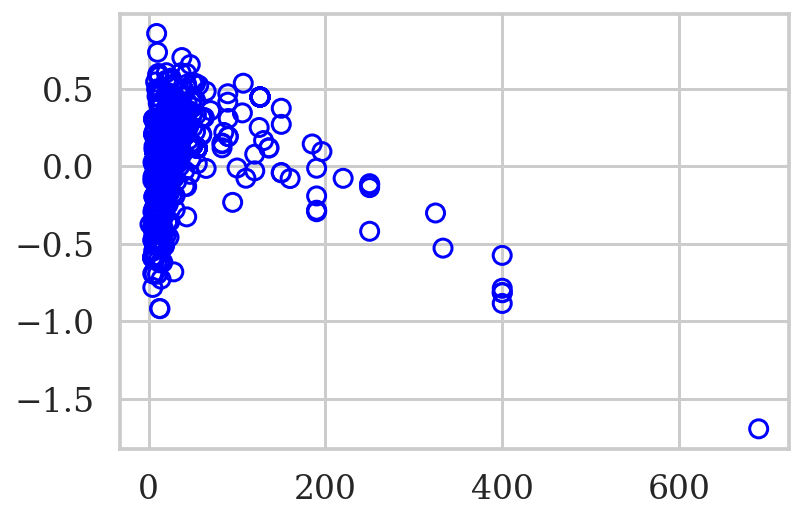

In [316]:
#average bottle price vs residuals
plt.scatter(wine_data['Average Price'], y_resid, facecolors='none', edgecolors='b')

In [274]:
#other Cleaning?

In [ ]:
#FOLLOW PRE-processing notebook
#convert categoricals and

In [ ]:
#convert year into age

In [ ]:
#reg test

LinearRegression()

In [62]:
linreg_model.coef_

array([0.0030779])

In [63]:
linreg_model.intercept_

3.8318511348027555

In [68]:
linreg_model.predict([[20]])

array([3.89340905])

In [69]:
linreg_model.predict([[100]])

array([4.13964074])

In [1]:
wine_data_clean_smaller.describe()

NameError: name 'wine_data_clean_smaller' is not defined